# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.47575086 0.41300574 0.42477044]
  [0.4709118  0.4081667  0.4199314 ]
  [0.4490799  0.38633478 0.39809948]
  ...
  [0.5539963  0.47948655 0.4873297 ]
  [0.5549642  0.4804544  0.48829752]
  [0.555932   0.4814222  0.48926532]]

 [[0.4770413  0.41429618 0.4260609 ]
  [0.47123444 0.40848932 0.42025402]
  [0.45101553 0.38827044 0.40003514]
  ...
  [0.5480044  0.47349456 0.4813377 ]
  [0.5470365  0.47252673 0.48036987]
  [0.5460687  0.4715589  0.47940204]]

 [[0.4783317  0.41558662 0.42735133]
  [0.47155702 0.40881193 0.42057663]
  [0.45295116 0.39020607 0.40197077]
  ...
  [0.54509807 0.47058827 0.4784314 ]
  [0.54509807 0.47058827 0.4784314 ]
  [0.54509807 0.47058827 0.4784314 ]]

 ...

 [[0.6477325  0.588909   0.6006737 ]
  [0.6483778  0.58955425 0.60131896]
  [0.649023   0.5901995  0.6019642 ]
  ...
  [0.6999967  0.6529379  0.660781  ]
  [0.69411767 0.64705884 0.654902  ]
  [0.6950732  0.64801437 0.6558575 ]]

 [[0.65749043 0.5986669  0.6104316 ]
  [0.66007125 0.6012477  0.61301243]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.61963266 0.6117895  0.6666915 ]
  [0.60019773 0.5923546  0.64725655]
  [0.59393257 0.58608943 0.6409914 ]
  ...
  [0.76627463 0.76627463 0.81333345]
  [0.77031165 0.77031165 0.8173705 ]
  [0.7743487  0.7743487  0.82140756]]

 [[0.6202538  0.61241066 0.6673126 ]
  [0.60268205 0.5948389  0.6497409 ]
  [0.59237987 0.58453673 0.6394387 ]
  ...
  [0.77764523 0.77764523 0.82470405]
  [0.77236605 0.77236605 0.81942487]
  [0.7670868  0.7670868  0.8141456 ]]

 [[0.6208748  0.6130317  0.66793364]
  [0.6051664  0.59732324 0.6522252 ]
  [0.59082717 0.58298403 0.637886  ]
  ...
  [0.7463601  0.7463601  0.79341894]
  [0.7494656  0.7494656  0.7965244 ]
  [0.7525709  0.7525709  0.79962975]]

 ...

 [[0.4532004  0.44535726 0.5002592 ]
  [0.45537418 0.44753104 0.502433  ]
  [0.45754796 0.44970483 0.5046068 ]
  ...
  [0.6117918  0.6078702  0.6706153 ]
  [0.6326407  0.62871915 0.69146425]
  [0.6392157  0.63529414 0.69803923]]

 [[0.4607102  0.45286706 0.50776905]
  [0.45977858 0.45193544 0.5068374 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\Hammad Computer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    verbose=1,
    epochs=20,
)


C:\Users\Hammad Computer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4714 - loss: 0.9105 - val_accuracy: 0.5814 - val_loss: 0.8375
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6388 - loss: 0.7152 - val_accuracy: 0.6977 - val_loss: 0.8030
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7112 - loss: 0.6164 - val_accuracy: 0.7535 - val_loss: 0.5677
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8041 - loss: 0.4323 - val_accuracy: 0.7907 - val_loss: 0.4398
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8260 - loss: 0.3773 - val_accuracy: 0.8186 - val_loss: 0.3856
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8699 - loss: 0.3241 - val_accuracy: 0.7023 - val_loss: 0.6574
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8818 - loss: 0.2998 - val_accuracy: 0.9116 - val_loss: 0.2425
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9117 - loss: 0.2706 - val_accuracy: 0.8930 - val_loss:

In [16]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 991ms/step - accuracy: 0.9698 - loss: 0.0967


In [17]:
scores

[0.09667235612869263, 0.9698376059532166]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 48}

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9105007648468018,
 0.7152348160743713,
 0.6163789629936218,
 0.4323270916938782,
 0.3773195445537567]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.5813953280448914,
 0.6976743936538696,
 0.7534883618354797,
 0.7906976938247681,
 0.8186046481132507,
 0.7023255825042725,
 0.9116278886795044,
 0.8930232524871826,
 0.9441860318183899,
 0.9441860318183899,
 0.9534883499145508,
 0.9674418568611145,
 0.9767441749572754,
 0.9674418568611145,
 0.9860464930534363,
 0.9441860318183899,
 0.9860464930534363,
 0.930232584476471,
 0.9674418568611145,
 0.9720930457115173]

In [26]:
acc

[0.47144755721092224,
 0.6387782096862793,
 0.711155354976654,
 0.8041168451309204,
 0.8260292410850525,
 0.8698539137840271,
 0.8818061351776123,
 0.9116865992546082,
 0.9269588589668274,
 0.9515272378921509,
 0.970783531665802,
 0.9634793996810913,
 0.9628154039382935,
 0.9468791484832764,
 0.9701195359230042,
 0.9727755784988403,
 0.9681274890899658,
 0.9614874124526978,
 0.9794156551361084,
 0.970783531665802]

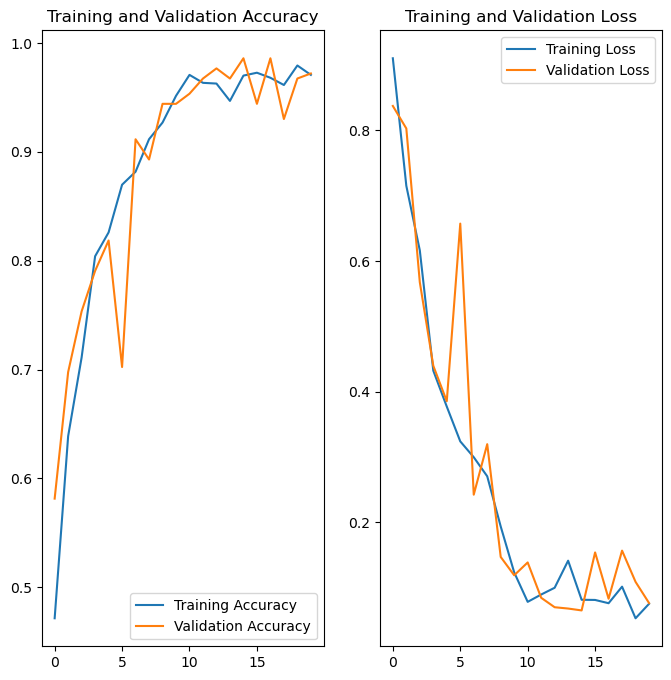

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
predicted label: Potato___Early_blight


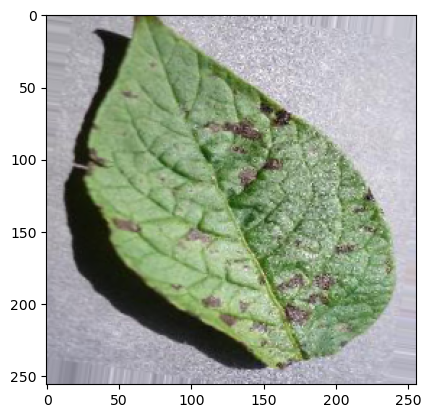

In [32]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


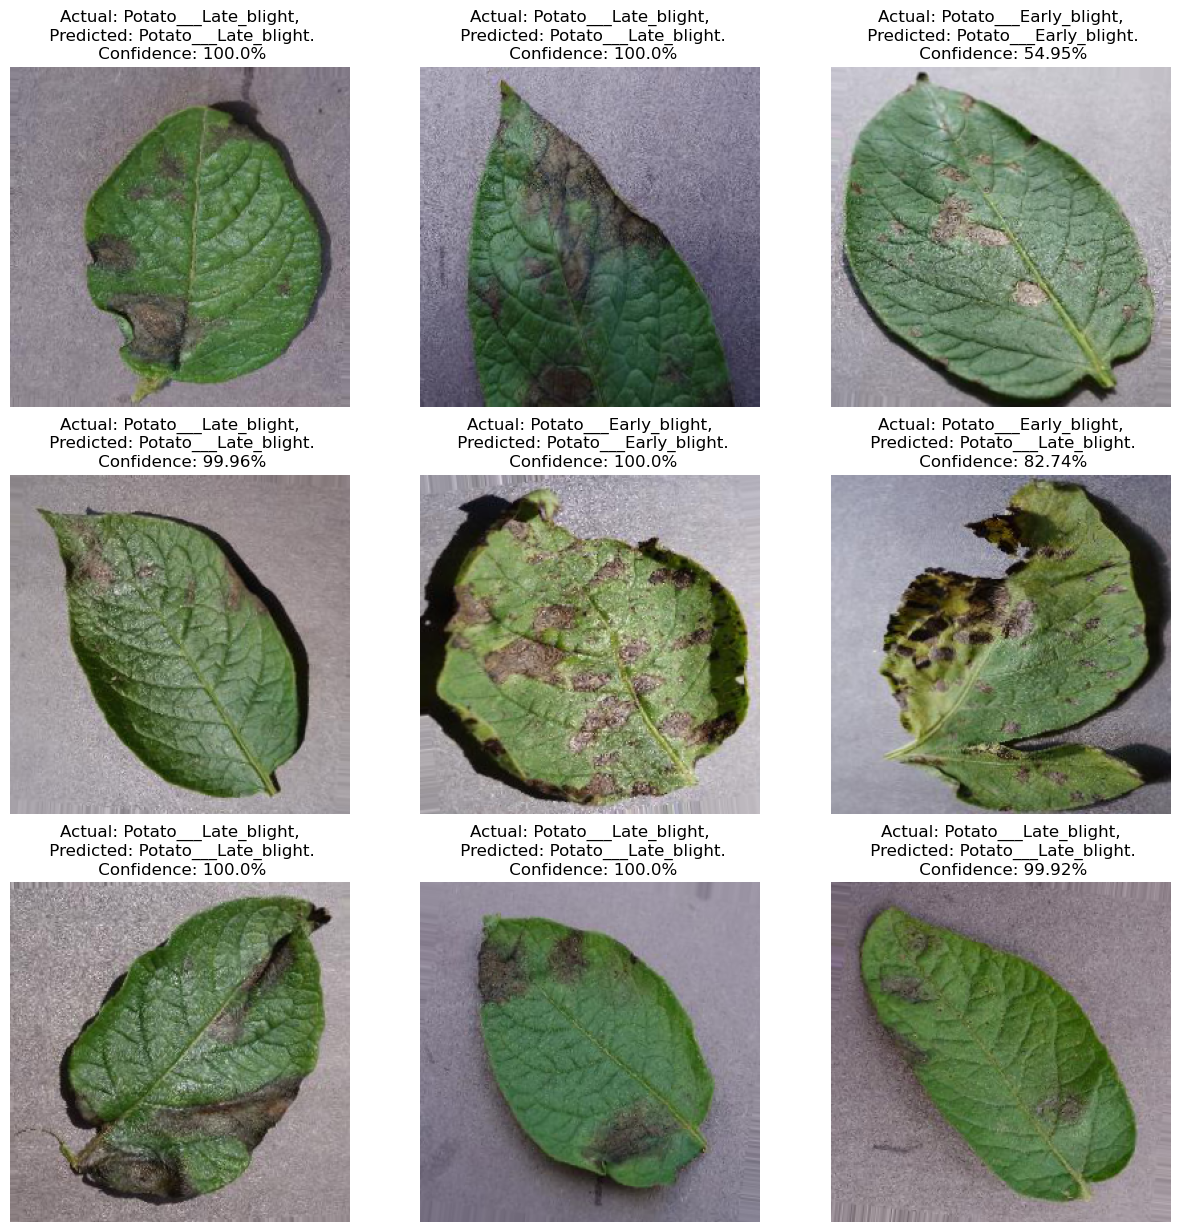

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [35]:
model.save("../potatoes.h5")